In [2]:
import  numpy              as np
import  pandas             as pd
import  matplotlib.pyplot  as plt
import  seaborn            as sns

import warnings
warnings.filterwarnings("ignore")

import pickle

# **Part 1 - Intro**

## **1. Read**

In [3]:
train = pd.read_csv ('E:\\Data Science\\Capstone project\\Final\\train_data.csv')

test  = pd.read_csv ('E:\\Data Science\\Capstone project\\Final\\test_data.csv')

In [4]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [5]:
data_info  = pd.read_csv ('E:\\Data Science\\Capstone project\\Final\\train_data_dictionary.csv' , index_col='Column')
data_info

,Description
Column,
case_id,Case_ID registered in Hospital
Hospital_code,Unique code for the Hospital
Hospital_type_code,Unique code for the type of Hospital
City_Code_Hospital,City Code of the Hospital
Hospital_region_code,Region Code of the Hospital
Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
Department,Department overlooking the case
Ward_Type,Code for the Ward type
Ward_Facility_Code,Code for the Ward Facility


In [6]:
print ( train.shape )
print ( test.shape  )

(318438, 18)
(137057, 17)


## **2. Col info**

In [7]:
train.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
case_id                              318438 non-null int64
Hospital_code                        318438 non-null int64
Hospital_type_code                   318438 non-null object
City_Code_Hospital                   318438 non-null int64
Hospital_region_code                 318438 non-null object
Available Extra Rooms in Hospital    318438 non-null int64
Department                           318438 non-null object
Ward_Type                            318438 non-null object
Ward_Facility_Code                   318438 non-null object
Bed Grade                            318325 non-null float64
patientid                            318438 non-null int64
City_Code_Patient                    313906 non-null float64
Type of Admission                    318438 non-null object
Severity of Illness                  318438 non-null object
Visitors with Patient                318438 non-null

In [8]:
train.nunique()

case_id                              318438
Hospital_code                            32
Hospital_type_code                        7
City_Code_Hospital                       11
Hospital_region_code                      3
Available Extra Rooms in Hospital        18
Department                                5
Ward_Type                                 6
Ward_Facility_Code                        6
Bed Grade                                 4
patientid                             92017
City_Code_Patient                        37
Type of Admission                         3
Severity of Illness                       3
Visitors with Patient                    28
Age                                      10
Admission_Deposit                      7300
Stay                                     11
dtype: int64

* Inference
    * Admission_Deposit , Visitors_with_patient, Available_Extra_Rooms are of continuous type.
    * Rest of the features are of categorical type. 

## **3. Data Mods**

### **i. Stay**

In [9]:
train['Stay']  .unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [10]:
train['Stay'] .replace ('More than 100 Days', '100+', inplace=True)

### **ii. Age**

In [11]:
train['Age'].unique()

array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
       '11-20', '0-10', '91-100'], dtype=object)

In [12]:
train['UB_Age']  =  train['Age'] .str.split  ('-', expand = True)  [1]  .astype(int)
test['UB_Age']   =  test['Age'] .str.split  ('-', expand = True)   [1]  .astype(int)

### **iii. IDs**

In [13]:
train.drop (['case_id','patientid'] , axis=1 , inplace=True)
test.drop  (['case_id','patientid'] , axis=1 , inplace=True)

# **Part 2 - EDA**

##  **1. Univariate Analysis**

###  **i. For Categorical Features**

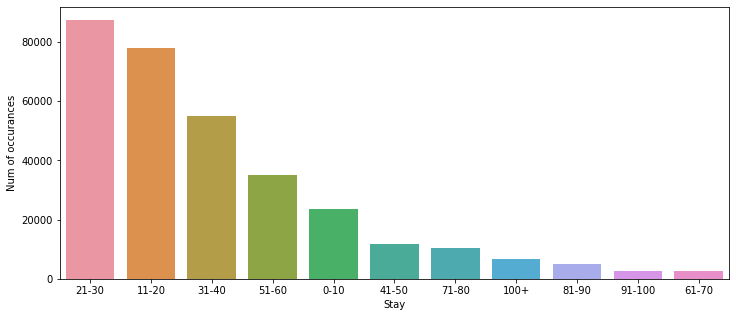

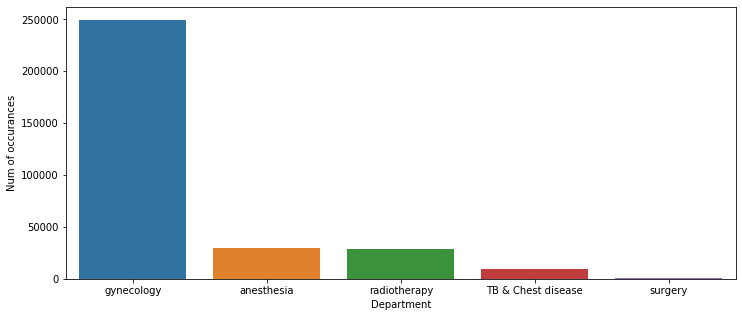

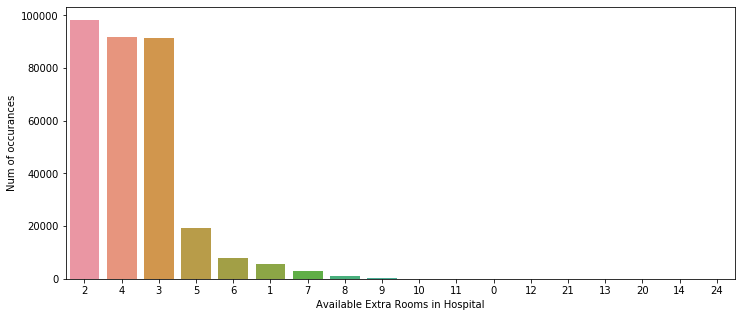

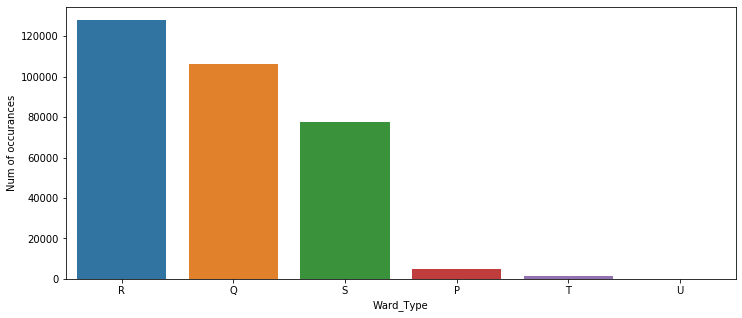

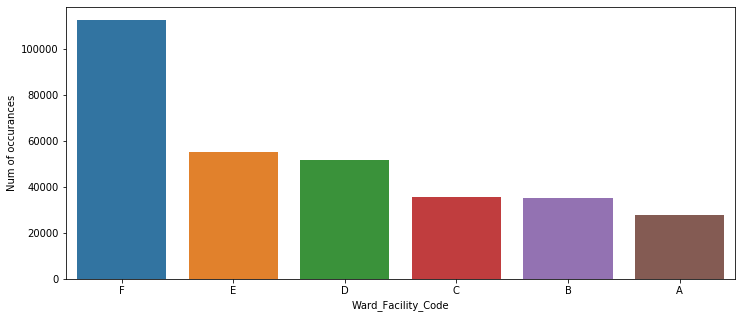

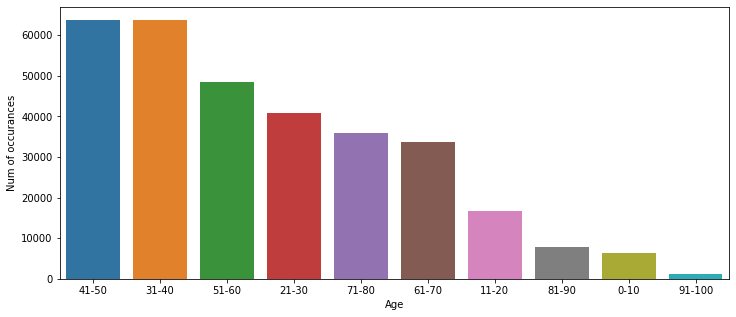

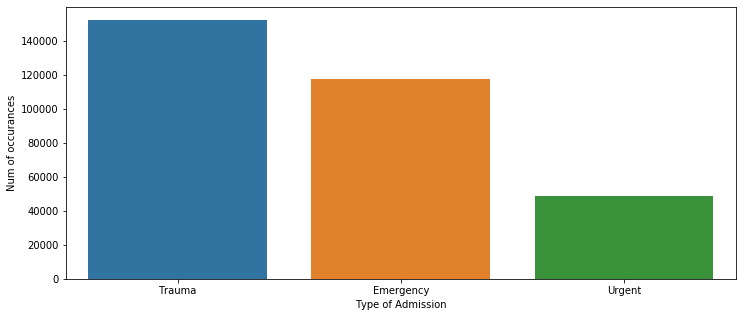

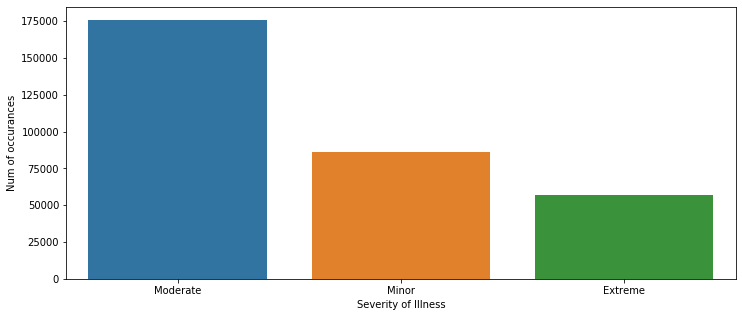

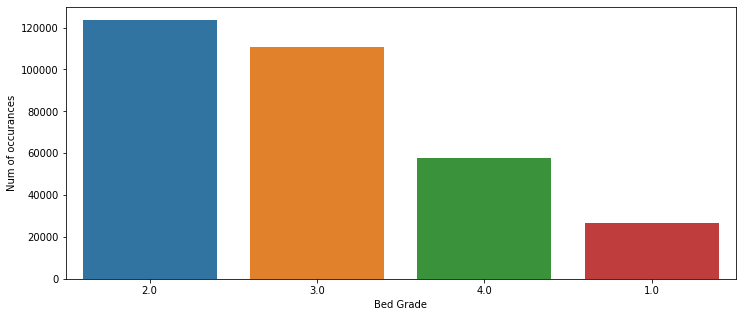

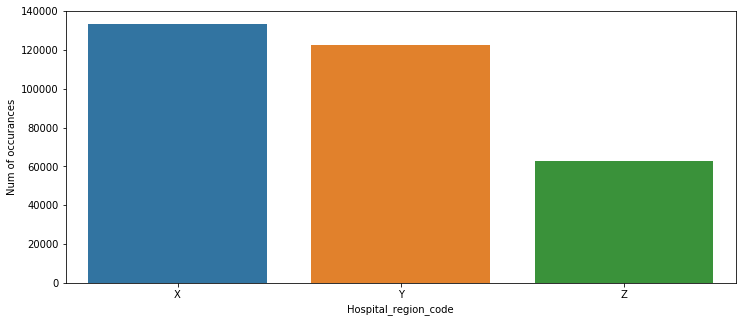

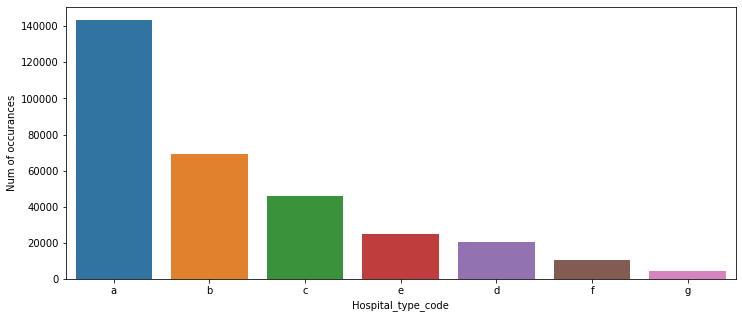

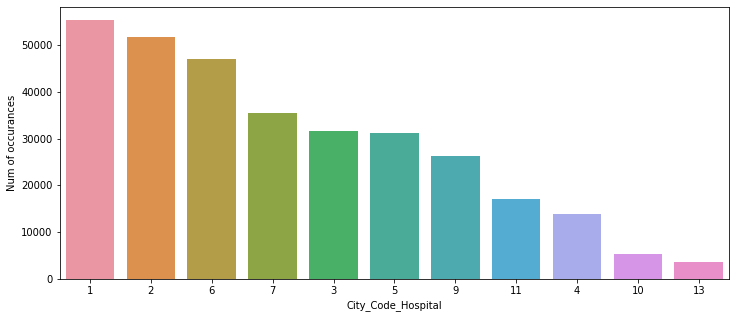

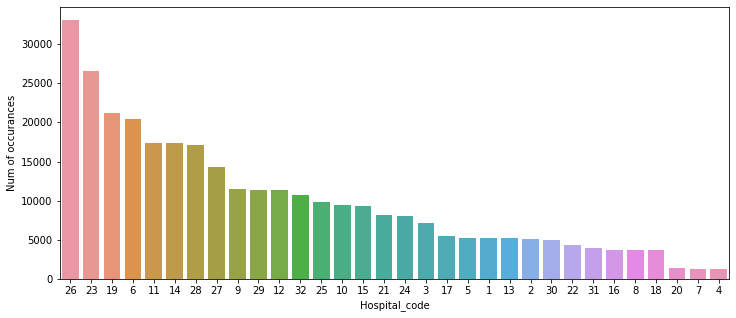

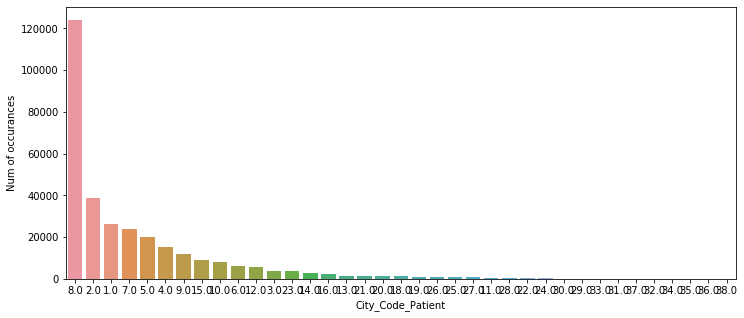

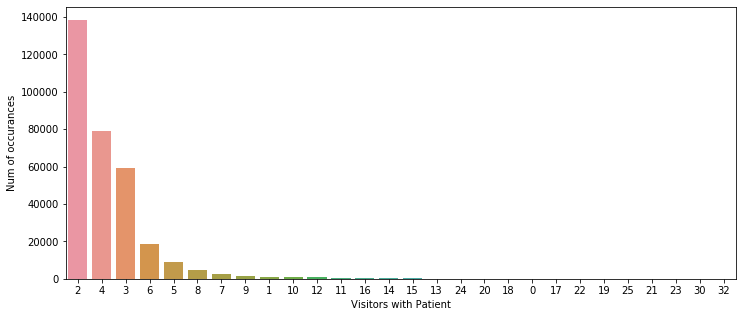

In [14]:
for i in [ 'Stay'               ,  'Department'         , 'Available Extra Rooms in Hospital'    , 'Ward_Type'          , 'Ward_Facility_Code'    ,  
           'Age'                ,  'Type of Admission'  , 'Severity of Illness'                  , 'Bed Grade'          , 'Hospital_region_code'  , 
           'Hospital_type_code' ,  'City_Code_Hospital' , 'Hospital_code'                        , 'City_Code_Patient'  , 'Visitors with Patient'  ]:
    
    vc = train[i].value_counts()

    plt.figure(figsize=(12,5))
    
    sns.barplot(x =vc.index.values, y =vc.values, order =vc.index)
    
    plt.xlabel(i)
    plt.ylabel('Num of occurances')

* Data is imbalanced. 
* Example :
    * Data related patients with the stay for more than 60 days is only about 10% of the overall data and for stay less than 40 days is almost 80% of the total data. 
    * most of the patients were admitted in gynecology department.
    * in general 2-4 rooms were available.
    * 97% of the total patients were admitted in 'R', 'S' and 'Q' type of ward.
    * 90% of the patients had age between 31-60 years.

### **ii. For Numeric Feature**

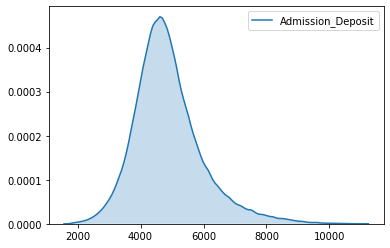

In [15]:
sns.kdeplot ( train['Admission_Deposit'] , shade=True );

## **2. Bivariate Analysis**

### **i. Categorical Cols**

In [16]:
sequence = [ '0-10' , '11-20' , '21-30' , '31-40' , '41-50' , '51-60' , '61-70' , '71-80' , '81-90' , '91-100' , '100+']

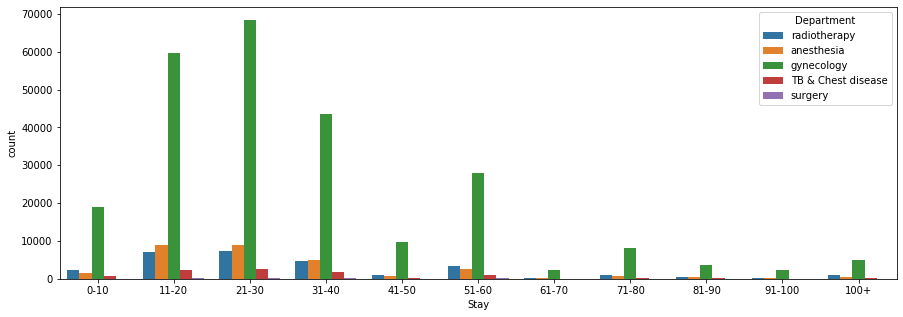

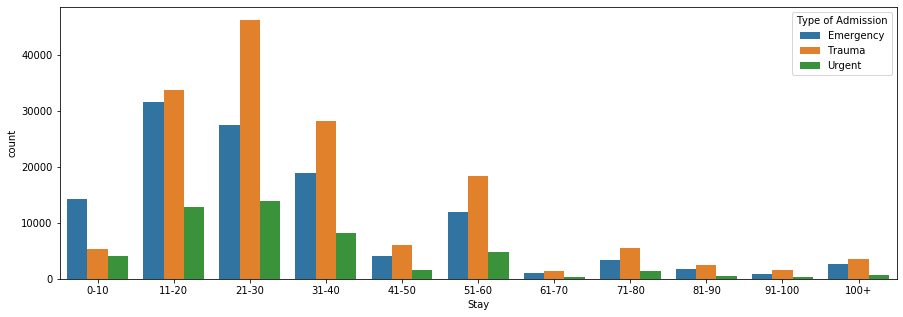

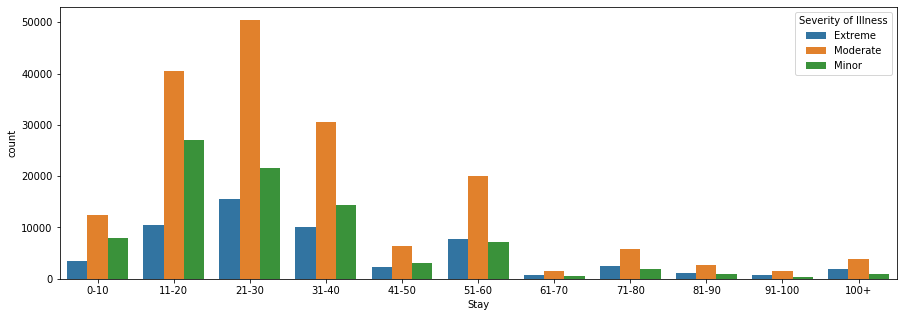

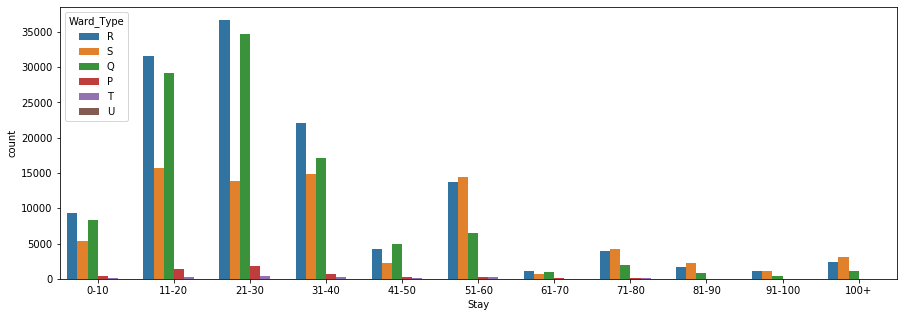

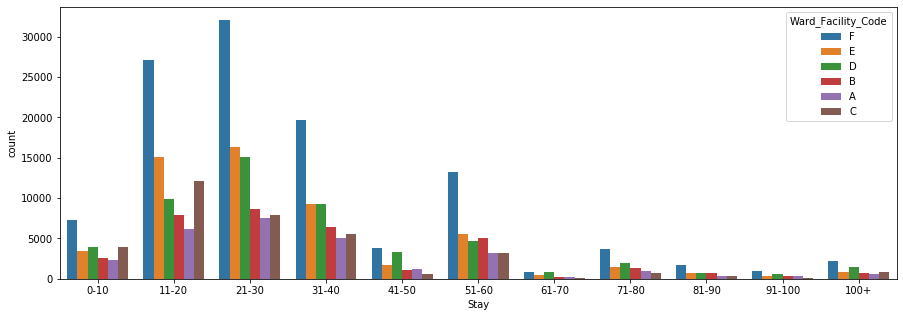

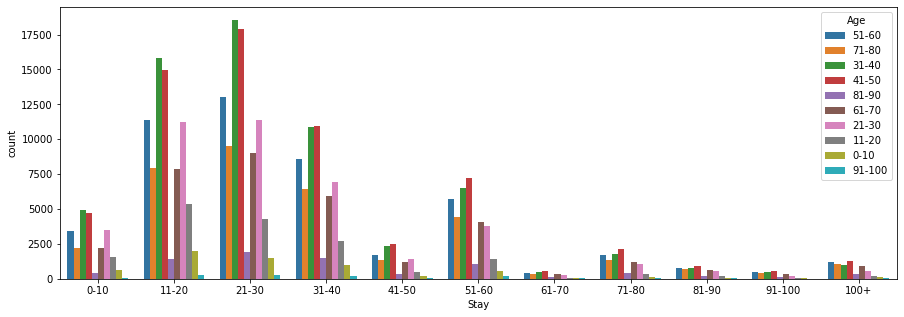

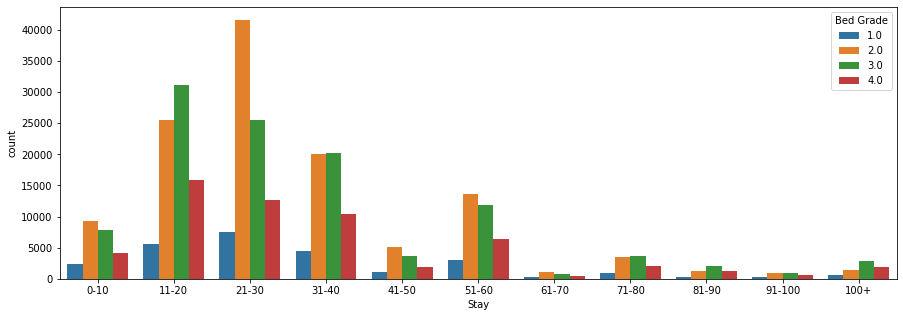

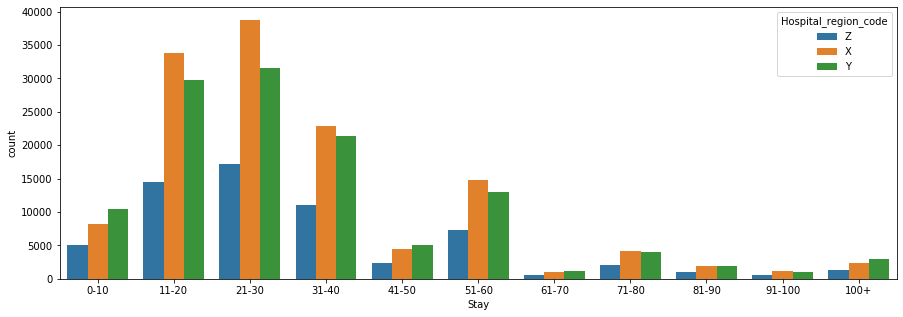

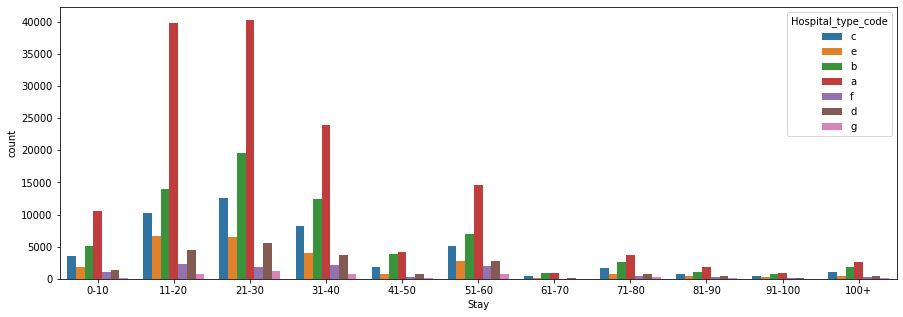

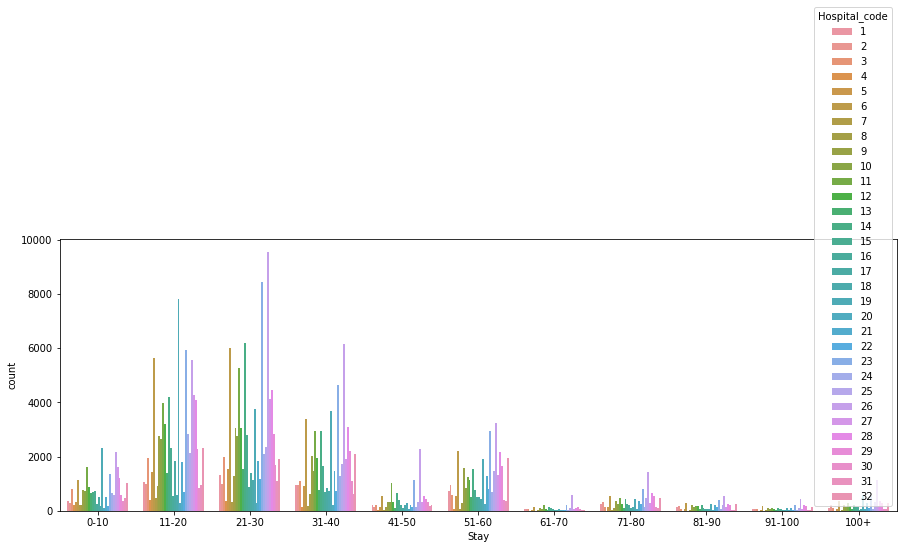

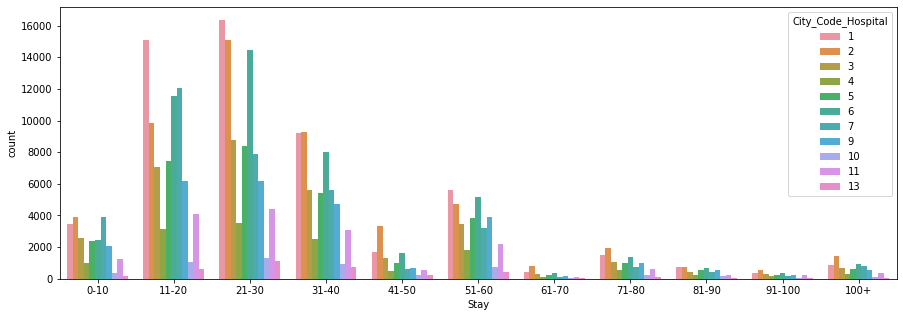

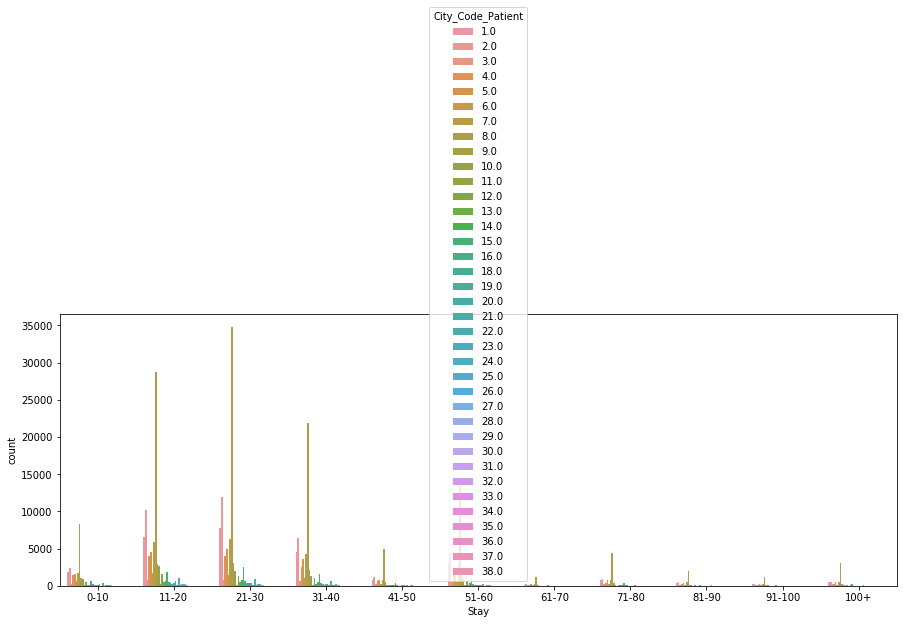

In [17]:
for i in [ 'Department'         ,   'Type of Admission'     , 'Severity of Illness'   ,  'Ward_Type'  , 'Ward_Facility_Code' ,  
           'Age'                ,   'Bed Grade'             , 'Hospital_region_code'  ,  'Hospital_type_code'                , 
           'Hospital_code'      ,   'City_Code_Hospital'    , 'City_Code_Patient'    ]:
    
    plt.figure (figsize=(15,5))

    sns.countplot (x ="Stay", hue =i, data =train, order =sequence);

* Hospital_code , City_Code_Hospital , City_Code_Patient contain lot of components

### **ii. For Numeric Cols**

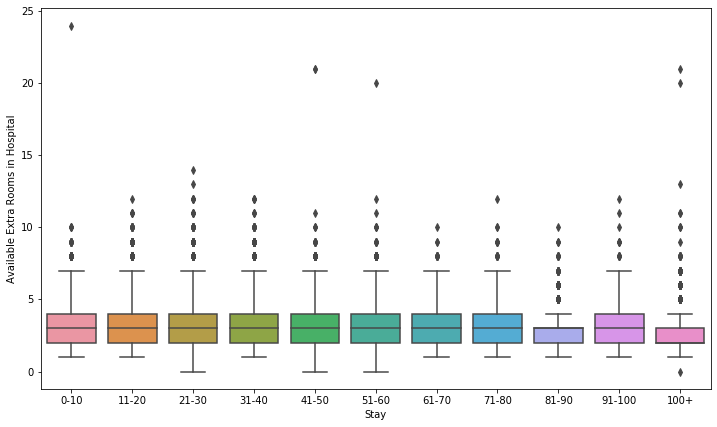

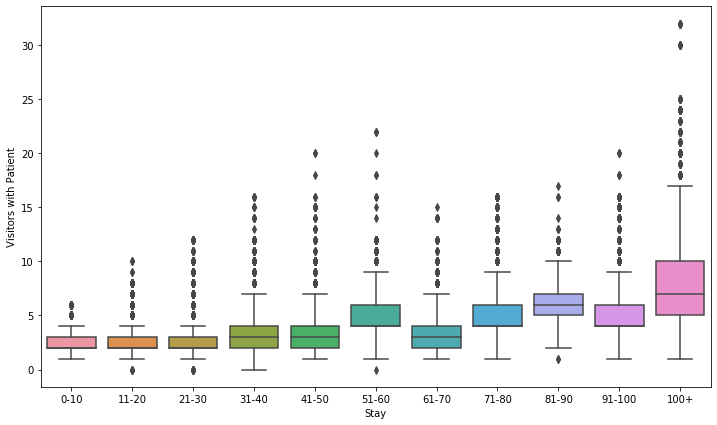

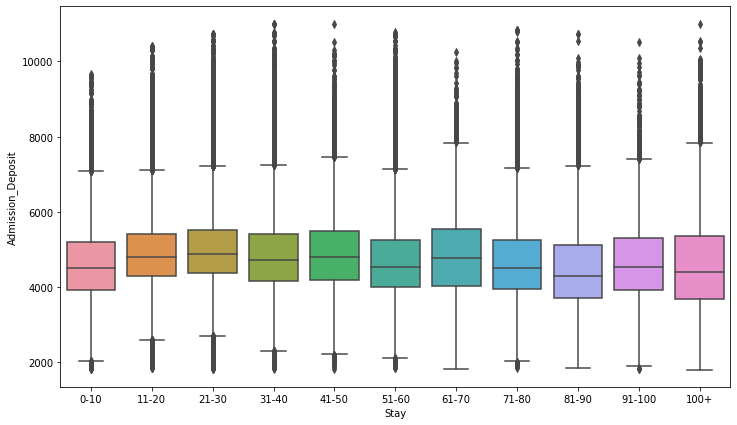

In [18]:
for i in ['Available Extra Rooms in Hospital', 'Visitors with Patient', 'Admission_Deposit']:
    
    plt.figure(figsize=(12,7))

    sns.boxplot ( x='Stay', y=i, order =sequence , data =train ) ;

# **Part 3 - NaN** 

## **1. Checking**

In [19]:
print ( 'NAN % on train data :\n',   np.round  (  train.isnull().sum() * 100   /  len(train)  ,   2 )      )
print ( '\n')
print ( 'NAN % on test data  :\n',   np.round  (  test.isnull().sum() * 100   /   len(test)   ,   2 )      )

NAN % on train data :
 Hospital_code                        0.00
Hospital_type_code                   0.00
City_Code_Hospital                   0.00
Hospital_region_code                 0.00
Available Extra Rooms in Hospital    0.00
Department                           0.00
Ward_Type                            0.00
Ward_Facility_Code                   0.00
Bed Grade                            0.04
City_Code_Patient                    1.42
Type of Admission                    0.00
Severity of Illness                  0.00
Visitors with Patient                0.00
Age                                  0.00
Admission_Deposit                    0.00
Stay                                 0.00
UB_Age                               0.00
dtype: float64


NAN % on test data  :
 Hospital_code                        0.00
Hospital_type_code                   0.00
City_Code_Hospital                   0.00
Hospital_region_code                 0.00
Available Extra Rooms in Hospital    0.00
Department   

## **2. Treatment**

In [20]:
train.dropna  (subset = ['Bed Grade', 'City_Code_Patient'], inplace = True)

test['Bed Grade']         .fillna  ( train['Bed Grade']          .mode()[0]  , inplace = True )
test['City_Code_Patient'] .fillna  ( train['City_Code_Patient']  .mode()[0]  , inplace = True )

# **Part 4 - Outlier**

## **1. Checking for Num Cols**

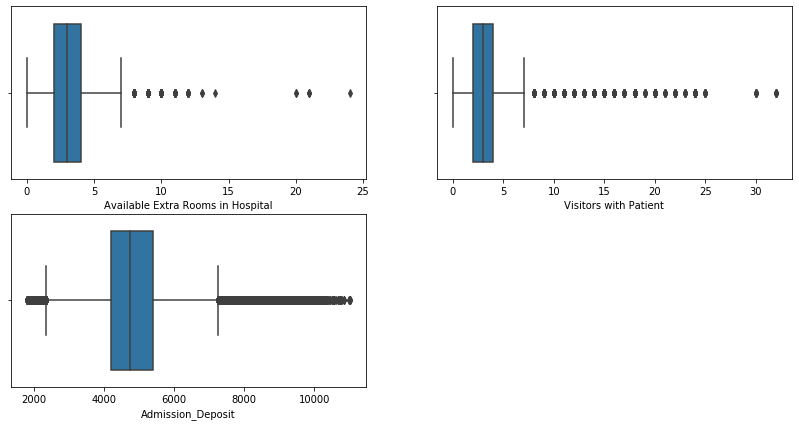

In [21]:
fig, ax = plt.subplots (2,2, figsize = (14,7))

sns.boxplot ( ax = ax[0, 0] , x = train['Available Extra Rooms in Hospital'])
sns.boxplot ( ax = ax[0, 1] , x = train['Visitors with Patient'])
sns.boxplot ( ax = ax[1, 0] , x = train['Admission_Deposit'])

fig.delaxes(ax[1,1])

plt.show()

# **Part 5 - Encoding** 

## **1. Ordinal Data**

In [22]:
admission_encode  = {'Trauma' : 1,  'Urgent'   : 2, 'Emergency' : 3 }
severity_encode   = {'Minor' :  1,  'Moderate' : 2, 'Extreme'   : 3 }


train ['Type of Admission']     =   train ['Type of Admission']   .map (admission_encode)
train ['Severity of Illness']   =   train ['Severity of Illness'] .map (severity_encode)


test ['Type of Admission']      =   test ['Type of Admission']    .map (admission_encode)
test ['Severity of Illness']    =   test ['Severity of Illness']  .map (severity_encode)

In [23]:
stay_encode = { '0-10':1 , '11-20':2 , '21-30':3 , '31-40':4 , '41-50':5 , '51-60':6 , '61-70':7 , '71-80':8 , '81-90':9 , '91-100': 10 , '100+':11 }

train ['Stay']  =   train ['Stay']  .map (stay_encode)

## **2. Nominal Data**

In [24]:
train = pd.get_dummies ( train, 
                      columns = ['Hospital_code' , 'Hospital_type_code' , 'City_Code_Hospital' , 'Hospital_region_code', 
                                 'Department'    , 'Ward_Type'          , 'Ward_Facility_Code' , 'City_Code_Patient'   ,  'Bed Grade']  ,
                      drop_first = True)


test = pd.get_dummies ( test, 
                      columns = ['Hospital_code' , 'Hospital_type_code' , 'City_Code_Hospital' , 'Hospital_region_code', 
                                 'Department'    , 'Ward_Type'          , 'Ward_Facility_Code' , 'City_Code_Patient'   ,  'Bed Grade']  ,
                      drop_first = True)

# **Part 6 - Scale Transform**

As scaling is must for distance based algorithm KNN.

Standard Scaler, Min-max scaling and Power Transform have huge effect on overall performance in KNN model, but minimal effect on random forest.

So we dont have to scale transform the data

# **Part 7 - Feature Selection**

In [25]:
train.drop ( 'Age'  , axis=1 , inplace=True )
test.drop  ( 'Age'  , axis=1 , inplace=True )

In [26]:
x =  train.drop ( ['Stay'] , axis=1 )
y =  train ['Stay']

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit ( x , y )

RandomForestClassifier()

In [28]:
table  =  pd.DataFrame   (  data = { 'Features' : x.columns  , 'Importance ratio' : (rf.feature_importances_*100).tolist() }    )

table.sort_values        (  by=['Importance ratio'] , ascending=False , inplace=True )

print (table.head(20))

                              Features  Importance ratio
4                    Admission_Deposit         28.776187
5                               UB_Age         12.967012
3                Visitors with Patient         11.054275
0    Available Extra Rooms in Hospital          7.751437
2                  Severity of Illness          4.241152
1                    Type of Admission          3.590859
75               City_Code_Patient_8.0          1.780180
56               Department_gynecology          1.634521
69               City_Code_Patient_2.0          1.309634
106                      Bed Grade_3.0          1.288956
74               City_Code_Patient_7.0          1.234242
72               City_Code_Patient_5.0          1.149006
105                      Bed Grade_2.0          1.142486
57             Department_radiotherapy          1.107965
107                      Bed Grade_4.0          1.049164
59                         Ward_Type_Q          1.018361
71               City_Code_Pati

# **Part 8 - Model Building**

Since our dataset has non-linear arrangement of data points, Non-linear model is preferred.
So Logistic regressor and Naive baye's are not applicable.

In [29]:
from sklearn.model_selection import KFold,cross_val_score
kfold=KFold(n_splits=10, shuffle=True, random_state=0)   

In [30]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_std=sc.fit_transform(x)

# Logistic Regressor

In [48]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

In [49]:
from sklearn.model_selection import cross_val_score    
score=cross_val_score(LR,X_std,y,cv=kfold,scoring='f1_weighted')
np.mean(1-score),np.std(score,ddof=1)

(0.642153647514786, 0.002563666374843507)

In [50]:
LR.fit(xtrain,ytrain)
ytest_pred=LR.predict(xtest)
ytrain_pred=LR.predict(xtrain)

In [51]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(ytest,ytest_pred)*100  

28.482653126261447

In [52]:
print(classification_report(ytest,ytest_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      6873
           2       0.29      0.10      0.15     23254
           3       0.29      0.91      0.44     26005
           4       0.05      0.00      0.00     16334
           5       0.00      0.00      0.00      3435
           6       0.20      0.06      0.10     10328
           7       0.00      0.00      0.00       813
           8       0.00      0.00      0.00      2955
           9       0.00      0.00      0.00      1418
          10       0.00      0.00      0.00       812
          11       0.00      0.00      0.00      1911

    accuracy                           0.28     94138
   macro avg       0.08      0.10      0.06     94138
weighted avg       0.18      0.28      0.17     94138



# NB

In [53]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()

In [54]:
score=cross_val_score(NB,X_std,y,cv=kfold,scoring='f1_weighted')
np.mean(1-score),np.std(score,ddof=1)

(0.9920712467864206, 0.000981838754582692)

In [55]:
NB.fit(xtrain,ytrain)
ytest_pred=NB.predict(xtest)
ytrain_pred=NB.predict(xtrain)

In [56]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(ytest,ytest_pred)*100  

17.710170175699506

In [57]:
print(classification_report(ytest,ytest_pred))

              precision    recall  f1-score   support

           1       0.13      0.15      0.14      6873
           2       0.37      0.27      0.31     23254
           3       0.38      0.24      0.29     26005
           4       0.24      0.01      0.01     16334
           5       0.06      0.08      0.07      3435
           6       0.18      0.13      0.15     10328
           7       0.01      0.28      0.03       813
           8       0.05      0.01      0.02      2955
           9       0.03      0.17      0.06      1418
          10       0.01      0.14      0.03       812
          11       0.09      0.40      0.15      1911

    accuracy                           0.18     94138
   macro avg       0.14      0.17      0.11     94138
weighted avg       0.27      0.18      0.19     94138



# knn

In [ ]:
#Distance
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=565,weights='uniform')   

score=cross_val_score(knn,X_std,y,cv=kfold,scoring='f1_weighted')
np.mean(1-score),np.std(score,ddof=1)
#accuracy=28 %

In [ ]:
#BE=0.7359632435774296, VE= 0.0018458082234970707

In [ ]:
#n_neighbors=565,weights='distance'
#BE=0.72,VE=0.0017,accuracy=28%

# Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(random_state=0)

In [56]:
score=cross_val_score(dt_model,x,y,cv=kfold,scoring='f1_weighted')         
np.mean(1-score),np.std(score,ddof=1)

(0.6983056001925816, 0.002381611754662787)

In [59]:
dt_model.fit(xtrain,ytrain)
ytest_pred=dt_model.predict(xtest)
ytrain_pred=dt_model.predict(xtrain)

In [60]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(ytest,ytest_pred)*100    

29.970893794217

In [61]:
print(classification_report(ytest,ytest_pred))

              precision    recall  f1-score   support

           1       0.18      0.18      0.18      6873
           2       0.34      0.35      0.35     23254
           3       0.38      0.38      0.38     26005
           4       0.25      0.25      0.25     16334
           5       0.06      0.06      0.06      3435
           6       0.32      0.31      0.32     10328
           7       0.03      0.03      0.03       813
           8       0.14      0.15      0.15      2955
           9       0.23      0.22      0.23      1418
          10       0.09      0.09      0.09       812
          11       0.36      0.37      0.37      1911

    accuracy                           0.30     94138
   macro avg       0.22      0.22      0.22     94138
weighted avg       0.30      0.30      0.30     94138



# Regularised Decision Tree

In [57]:
parameter={'max_depth':np.arange(1,100),'criterion' : ['entropy','gini']}  

from sklearn.model_selection import GridSearchCV
GS=GridSearchCV(dt_model,parameter,cv=kfold,scoring='f1_weighted')        
GS.fit(x,y)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='f1_weighted')

In [58]:
GS.best_params_

{'criterion': 'gini', 'max_depth': 11}

In [71]:
dt_reg=DecisionTreeClassifier(max_depth=11,criterion='gini',random_state=0) 

In [72]:
score=cross_val_score(dt_reg,x,y,cv=kfold,scoring='f1_weighted')        
np.mean(1-score),np.std(score,ddof=1)

(0.6241104357752365, 0.001581958557462732)

In [98]:
dt_reg.fit(xtrain,ytrain)
y_test_pred=dt_reg.predict(xtest)
y_train_pred=dt_reg.predict(xtrain)

In [99]:
accuracy_score(ytest,y_test_pred)*100 

40.530922687968726

In [100]:
print(classification_report(ytest,y_test_pred))

              precision    recall  f1-score   support

           1       0.33      0.14      0.20      6873
           2       0.41      0.48      0.44     23254
           3       0.41      0.63      0.50     26005
           4       0.39      0.23      0.29     16334
           5       0.11      0.00      0.00      3435
           6       0.40      0.46      0.43     10328
           7       0.17      0.00      0.00       813
           8       0.28      0.03      0.06      2955
           9       0.36      0.22      0.27      1418
          10       0.14      0.00      0.01       812
          11       0.51      0.38      0.44      1911

    accuracy                           0.41     94138
   macro avg       0.32      0.23      0.24     94138
weighted avg       0.38      0.41      0.37     94138



# Random Forest

In [52]:
#Tune n-estimator for random forest (Customised Gridsearch)----criterion='entropy'
RF_ve=[]
RF_be=[]
for n in range(1,20):
    RF=RandomForestClassifier(n_estimators=n,criterion='entropy',random_state=0)
   
    score=cross_val_score(RF,x,y,cv=kfold,scoring='f1_weighted')
    RF_be.append(np.mean(1-score))
    RF_ve.append(np.std(score,ddof=1))

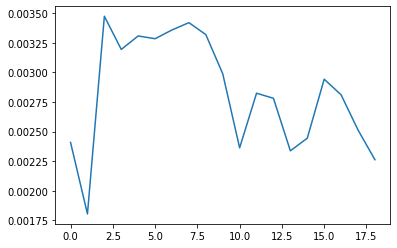

In [53]:
x_axis=np.arange(len(RF_ve))
plt.plot(x_axis,RF_ve)
plt.show()

In [59]:
np.min(RF_ve),np.argmin(RF_ve),RF_be[1] 

(0.0018043128917041235, 1, 0.7000196791709283)

In [101]:
RF_entropy=RandomForestClassifier(n_estimators=2,criterion='entropy',random_state=0)

In [102]:
RF_entropy.fit(xtrain,ytrain)
y_test_pred=RF_entropy.predict(xtest)
y_train_pred=RF_entropy.predict(xtrain)

In [103]:
accuracy_score(ytest,y_test_pred)*100 

30.845142237991034

In [104]:
print(classification_report(ytest,y_test_pred))

              precision    recall  f1-score   support

           1       0.16      0.29      0.21      6873
           2       0.32      0.46      0.38     23254
           3       0.38      0.36      0.37     26005
           4       0.28      0.23      0.25     16334
           5       0.06      0.03      0.04      3435
           6       0.36      0.24      0.29     10328
           7       0.02      0.01      0.01       813
           8       0.18      0.07      0.10      2955
           9       0.26      0.10      0.14      1418
          10       0.11      0.03      0.04       812
          11       0.57      0.14      0.22      1911

    accuracy                           0.31     94138
   macro avg       0.25      0.18      0.19     94138
weighted avg       0.31      0.31      0.30     94138



In [60]:
#Tune n-estimator for random forest (Customised Gridsearch)---criterion='gini'
RF_ve=[]
RF_be=[]
for n in range(1,40):
    RF=RandomForestClassifier(n_estimators=n,criterion='gini' ,random_state=0)
    
    score=cross_val_score(RF,x,y,cv=kfold,scoring='f1_weighted')
    RF_be.append(np.mean(1-score))
    RF_ve.append(np.std(score,ddof=1))

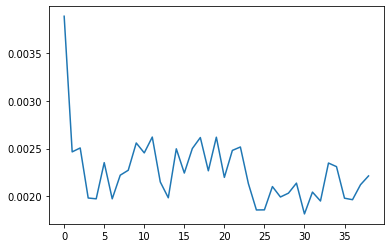

In [61]:
x_axis=np.arange(len(RF_ve))
plt.plot(x_axis,RF_ve)
plt.show()

In [68]:
np.min(RF_ve),np.argmin(RF_ve),RF_be[30]

(0.0018139430835408723, 30, 0.6427192128450018)

In [105]:
RF_gini=RandomForestClassifier(n_estimators=31,criterion='gini',random_state=0)

In [106]:
RF_gini.fit(xtrain,ytrain)
y_test_pred=RF_gini.predict(xtest)
y_train_pred=RF_gini.predict(xtrain)

In [107]:
accuracy_score(ytest,y_test_pred)*100 

36.95425864156876

In [108]:
print(classification_report(ytest,y_test_pred))

              precision    recall  f1-score   support

           1       0.26      0.17      0.21      6873
           2       0.38      0.44      0.41     23254
           3       0.41      0.50      0.45     26005
           4       0.31      0.27      0.29     16334
           5       0.09      0.03      0.05      3435
           6       0.39      0.43      0.41     10328
           7       0.08      0.02      0.03       813
           8       0.24      0.10      0.14      2955
           9       0.35      0.15      0.21      1418
          10       0.21      0.06      0.09       812
          11       0.55      0.39      0.45      1911

    accuracy                           0.37     94138
   macro avg       0.30      0.23      0.25     94138
weighted avg       0.35      0.37      0.35     94138



# Ada boost RF

In [1]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
AB=AdaBoostClassifier()

In [70]:
RF=RandomForestClassifier(n_estimators=31,criterion='gini' ,random_state=0)

In [73]:
#Tune n-estimator for RF (Customised Gridsearch)
RF_AB_ve=[]
RF_AB_be=[]
for n in range(1,10):
    RF_AB=AdaBoostClassifier(base_estimator=RF,n_estimators=n,random_state=0) 
    RF_AB_score=cross_val_score(RF_AB,x,y,cv=kfold,scoring='f1_weighted')
    RF_AB_be.append(np.mean(1-RF_AB_score))
    RF_AB_ve.append(np.std(RF_AB_score,ddof=1))

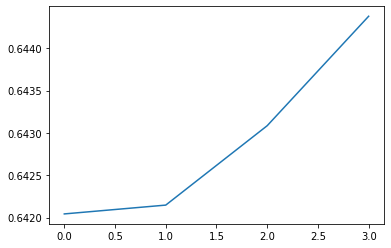

In [74]:
x_axis=np.arange(len(RF_AB_be))
plt.plot(x_axis,RF_AB_be)
plt.show()

In [76]:
np.min(RF_AB_be),np.argmin(RF_AB_be),RF_AB_ve[4]

(nan, 4, nan)

In [87]:
RF_AB_be[0],RF_AB_ve[0]

(0.642043394769449, 0.002047601643009975)

In [109]:
RF_gini=RandomForestClassifier(n_estimators=31,criterion='gini',random_state=0)
RF_AB=AdaBoostClassifier(base_estimator=RF_gini,n_estimators=1,random_state=0)

In [110]:
RF_AB.fit(xtrain,ytrain)
y_test_pred=RF_AB.predict(xtest)
y_train_pred=RF_AB.predict(xtrain)

In [111]:
accuracy_score(ytest,y_test_pred)*100 

37.08385561622299

In [112]:
print(classification_report(ytest,y_test_pred))

              precision    recall  f1-score   support

           1       0.26      0.17      0.20      6873
           2       0.38      0.43      0.40     23254
           3       0.41      0.51      0.45     26005
           4       0.31      0.27      0.29     16334
           5       0.10      0.03      0.05      3435
           6       0.39      0.43      0.41     10328
           7       0.09      0.02      0.03       813
           8       0.25      0.11      0.15      2955
           9       0.40      0.17      0.23      1418
          10       0.23      0.06      0.10       812
          11       0.54      0.41      0.47      1911

    accuracy                           0.37     94138
   macro avg       0.30      0.24      0.25     94138
weighted avg       0.35      0.37      0.36     94138



# Ada boost - DT

In [73]:
dt_reg=DecisionTreeClassifier(max_depth=11,criterion='gini',random_state=0) 

In [74]:
#Tune n-estimator for DT-regularised (Customised Gridsearch)
DT_AB_ve=[]
DT_AB_be=[]
for n in range(1,10):
    DT_AB=AdaBoostClassifier(base_estimator=dt_reg,n_estimators=n,random_state=0)        
    DT_AB_score=cross_val_score(DT_AB,x,y,cv=kfold,scoring='f1_weighted')
    DT_AB_be.append(np.mean(1-DT_AB_score))
    DT_AB_ve.append(np.std(DT_AB_score,ddof=1))

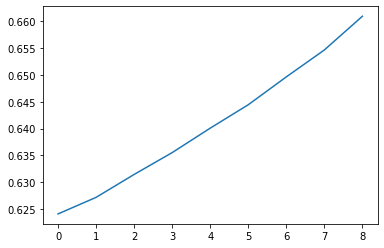

In [75]:
x_axis=np.arange(len(DT_AB_be))
plt.plot(x_axis,DT_AB_be)
plt.show()

In [77]:
np.min(DT_AB_be),np.argmin(DT_AB_be),DT_AB_ve[0]

(0.6240675576181538, 0, 0.0015744237521279163)

In [78]:
DT_AB=AdaBoostClassifier(n_estimators=1,random_state=0) 

In [79]:
DT_AB.fit(xtrain,ytrain)
y_test_pred=DT_AB.predict(xtest)
y_train_pred=DT_AB.predict(xtrain)

In [80]:
accuracy_score(ytest,y_test_pred)*100 

30.595508721239035

In [81]:
print(classification_report(ytest,y_test_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      6873
           2       0.00      0.00      0.00     23254
           3       0.35      0.80      0.49     26005
           4       0.23      0.49      0.31     16334
           5       0.00      0.00      0.00      3435
           6       0.00      0.00      0.00     10328
           7       0.00      0.00      0.00       813
           8       0.00      0.00      0.00      2955
           9       0.00      0.00      0.00      1418
          10       0.00      0.00      0.00       812
          11       0.00      0.00      0.00      1911

    accuracy                           0.31     94138
   macro avg       0.05      0.12      0.07     94138
weighted avg       0.14      0.31      0.19     94138



In [65]:
#Tune n-estimator for DT-regularised (Customised Gridsearch)
DT_AB_ve=[]
DT_AB_be=[]
for n in range(1,10):
    DT_AB=AdaBoostClassifier(n_estimators=n,random_state=0)         #default is DT-regularised 
    DT_AB_score=cross_val_score(DT_AB,x,y,cv=kfold,scoring='f1_weighted')
    DT_AB_be.append(np.mean(1-DT_AB_score))
    DT_AB_ve.append(np.std(DT_AB_score,ddof=1))

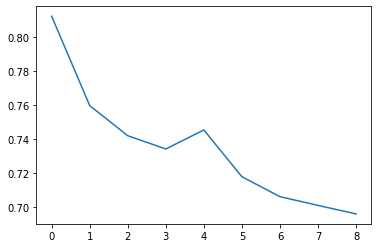

In [66]:
x_axis=np.arange(len(DT_AB_be))
plt.plot(x_axis,DT_AB_be)
plt.show()

In [68]:
np.min(DT_AB_be),np.argmin(DT_AB_be),DT_AB_ve[8]

(0.6958042802232915, 8, 0.0034942002944816316)

In [69]:
DT_AB=AdaBoostClassifier(n_estimators=9,random_state=0) 

In [70]:
DT_AB.fit(xtrain,ytrain)
y_test_pred=DT_AB.predict(xtest)
y_train_pred=DT_AB.predict(xtrain)

In [71]:
accuracy_score(ytest,y_test_pred)*100 

36.07469884637447

In [72]:
print(classification_report(ytest,y_test_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      6873
           2       0.33      0.33      0.33     23254
           3       0.38      0.69      0.49     26005
           4       0.31      0.13      0.18     16334
           5       0.04      0.00      0.00      3435
           6       0.35      0.55      0.43     10328
           7       0.00      0.00      0.00       813
           8       0.00      0.00      0.00      2955
           9       0.00      0.00      0.00      1418
          10       0.00      0.00      0.00       812
          11       0.54      0.28      0.37      1911

    accuracy                           0.36     94138
   macro avg       0.18      0.18      0.16     94138
weighted avg       0.29      0.36      0.30     94138



# Gradient boost (XG boost)

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier(random_state=0)

In [64]:
#Tune n-estimator for Gradient boost (Customised Gridsearch)
GB_ve=[]
GB_be=[]
for n in range(1,25):
    GB=GradientBoostingClassifier(n_estimators=n,random_state=0) 
    
    GB_score=cross_val_score(GB,x,y,cv=kfold,scoring='f1_weighted')
    GB_be.append(np.mean(1-GB_score))
    GB_ve.append(np.std(GB_score,ddof=1))

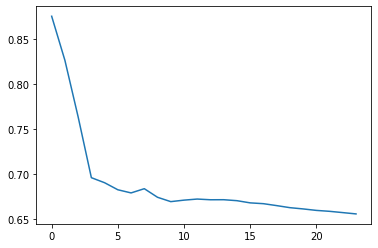

In [65]:
x_axis=np.arange(len(GB_be))
plt.plot(x_axis,GB_be)
plt.show()

In [67]:
np.min(GB_be),np.argmin(GB_be),GB_ve[23]

(0.6554782616868489, 23, 0.0030845020650415414)

In [113]:
GB=GradientBoostingClassifier(n_estimators=24,random_state=0)

In [114]:
GB.fit(xtrain,ytrain)
y_test_pred=GB.predict(xtest)
y_train_pred=GB.predict(xtrain)

In [115]:
accuracy_score(ytest,y_test_pred)*100 

39.70341413669294

In [116]:
print(classification_report(ytest,y_test_pred))

              precision    recall  f1-score   support

           1       0.43      0.08      0.13      6873
           2       0.41      0.40      0.41     23254
           3       0.40      0.72      0.52     26005
           4       0.37      0.09      0.15     16334
           5       0.14      0.00      0.00      3435
           6       0.36      0.61      0.46     10328
           7       0.00      0.00      0.00       813
           8       0.08      0.00      0.00      2955
           9       0.32      0.20      0.24      1418
          10       0.00      0.00      0.00       812
          11       0.51      0.41      0.45      1911

    accuracy                           0.40     94138
   macro avg       0.27      0.23      0.21     94138
weighted avg       0.37      0.40      0.34     94138



In [ ]:
from  sklearn.model_selection   import   RandomizedSearchCV

In [85]:
kf  =  KFold (shuffle=True, n_splits=10, random_state=0) 

rfc =  RandomForestClassifier ()

param = { 'n_estimators': np.arange(1,55)   ,  'criterion':['entropy','gini'] , 'max_depth':np.arange(1,20) , 'min_samples_leaf':np.arange(5,10) } 

RSCV  =  RandomizedSearchCV (rfc , param , cv=kf , scoring='f1_weighted')

RSCV.fit (x,y)

RSCV.best_params_

{'n_estimators': 44,
 'min_samples_leaf': 2,
 'max_depth': 17,
 'criterion': 'entropy'}

In [39]:
clf=RandomForestClassifier ( n_estimators=38 , criterion='gini', max_depth=15 , min_samples_leaf=6 , max_features=.2 , random_state=0 )

In [40]:
score=cross_val_score(clf,x,y,cv=kfold,scoring='f1_weighted')
np.mean(1-score),np.std(score,ddof=1)

(0.6178724585737586, 0.002002590839949783)

In [33]:
clf.fit(xtrain,ytrain)
y_test_pred=clf.predict(xtest)
y_train_pred=clf.predict(xtrain)

In [35]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(ytest,y_test_pred)*100 #DT-reg=0.6241104357752365, 0.001581958557462732

42.196562493360815

In [36]:
print(classification_report(ytest,y_test_pred))

              precision    recall  f1-score   support

           1       0.40      0.11      0.17      6873
           2       0.42      0.51      0.46     23254
           3       0.42      0.66      0.51     26005
           4       0.43      0.23      0.30     16334
           5       0.00      0.00      0.00      3435
           6       0.40      0.51      0.45     10328
           7       0.00      0.00      0.00       813
           8       0.57      0.01      0.01      2955
           9       0.53      0.09      0.15      1418
          10       1.00      0.00      0.00       812
          11       0.54      0.44      0.48      1911

    accuracy                           0.42     94138
   macro avg       0.43      0.23      0.23     94138
weighted avg       0.41      0.42      0.38     94138



In [32]:
clf=RandomForestClassifier ( n_estimators=38 , criterion='gini', max_depth=15 , min_samples_leaf=6 , max_features=.2 , random_state=0 )

In [33]:
#Tune n-estimator for RF (Customised Gridsearch)
clf_AB_ve=[]
clf_AB_be=[]
for n in range(1,10):
    clf_AB=AdaBoostClassifier(base_estimator=clf,n_estimators=n,random_state=0) 
    clf_AB_score=cross_val_score(clf_AB,x,y,cv=kfold,scoring='f1_weighted')
    clf_AB_be.append(np.mean(1-clf_AB_score))
    clf_AB_ve.append(np.std(clf_AB_score,ddof=1))

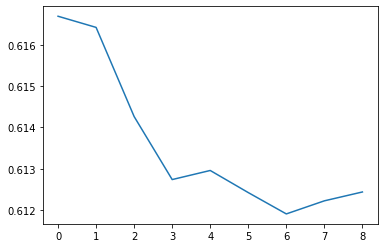

In [34]:
x_axis=np.arange(len(clf_AB_be))
plt.plot(x_axis,clf_AB_be)
plt.show()

In [59]:
np.min(clf_AB_be),np.argmin(clf_AB_be),clf_AB_ve[3] 

(0.6127362227826012, 3, 0.0021843625487102643)

In [36]:
np.min(clf_AB_be),np.argmin(clf_AB_be),clf_AB_ve[6] 

(0.611903547310453, 6, 0.002902074724340018)

In [86]:
clf=RandomForestClassifier ( n_estimators=38 , criterion='gini', max_depth=15 , min_samples_leaf=6 , max_features=.2 , random_state=0 )
clf_AB=AdaBoostClassifier(base_estimator=clf,n_estimators=4,random_state=0) 

In [61]:
clf_AB.fit(xtrain,ytrain)
y_test_pred=clf_AB.predict(xtest)
y_train_pred=clf_AB.predict(xtrain)

In [62]:
accuracy_score(ytest,y_test_pred)*100

42.388833414774055

In [63]:
print(classification_report(ytest,y_test_pred))

              precision    recall  f1-score   support

           1       0.40      0.12      0.19      6873
           2       0.43      0.49      0.46     23254
           3       0.42      0.67      0.52     26005
           4       0.42      0.23      0.30     16334
           5       0.25      0.00      0.00      3435
           6       0.41      0.53      0.46     10328
           7       1.00      0.00      0.00       813
           8       0.38      0.03      0.05      2955
           9       0.43      0.14      0.21      1418
          10       0.56      0.01      0.01       812
          11       0.56      0.42      0.48      1911

    accuracy                           0.42     94138
   macro avg       0.48      0.24      0.24     94138
weighted avg       0.42      0.42      0.39     94138



# **Part 9 - Submission**

## **1. Fit the model into entire data**

In [87]:
clf_AB.fit ( x , y )

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=15,
                                                         max_features=0.2,
                                                         min_samples_leaf=6,
                                                         n_estimators=38,
                                                         random_state=0),
                   n_estimators=4, random_state=0)

In [ ]:
ls          =  test.columns.tolist()

in_data     =  test [ls]

out_data    =  clf.predict (in_data)

## **2. Create submission file**

In [ ]:
test   =  pd.read_csv ('data_test.csv')
submit =  pd.DataFrame()

In [ ]:
submit ['case_id']  =  test['case_id']
submit ['Stay']     =  out_data

stay_decode         =  {  1 : '0-10', 2 : '11-20', 3 : '21-30', 4 : '31-40', 5 : '41-50', 6 : '51-60', 7 : '61-70',8 : '71-80', 9 : '81-90', 
                         10 : '91-100', 11 : 'More than 100 Days' }

submit ['Stay']     =  submit ['Stay'].map(stay_decode)

submit.head(15)

In [ ]:
# submit.to_csv  ( 'Submission_File.csv' , index = False , header = True )

# **Part 10 : Deployment**

In [90]:
import gzip
pickle.dump(clf_AB, gzip.open("Model.pkl", 'wb'), protocol=pickle.HIGHEST_PROTOCOL)